In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
m_age=df['Age'].median()

In [6]:
df['Age']=df['Age'].fillna(m_age)

In [7]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,28.0,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [11]:
X_test

,Age,Fare
709,28.0,15.2458
439,31.0,10.5000
840,20.0,7.9250
720,6.0,33.0000
39,14.0,11.2417
...,...,...
433,17.0,7.1250
773,28.0,7.2250
25,38.0,31.3875
84,17.0,10.5000


In [12]:
#SOME VISUALISATIONS
import scipy.stats as stats


C:\Users\DELL\AppData\Local\Temp\ipykernel_12204\589721089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


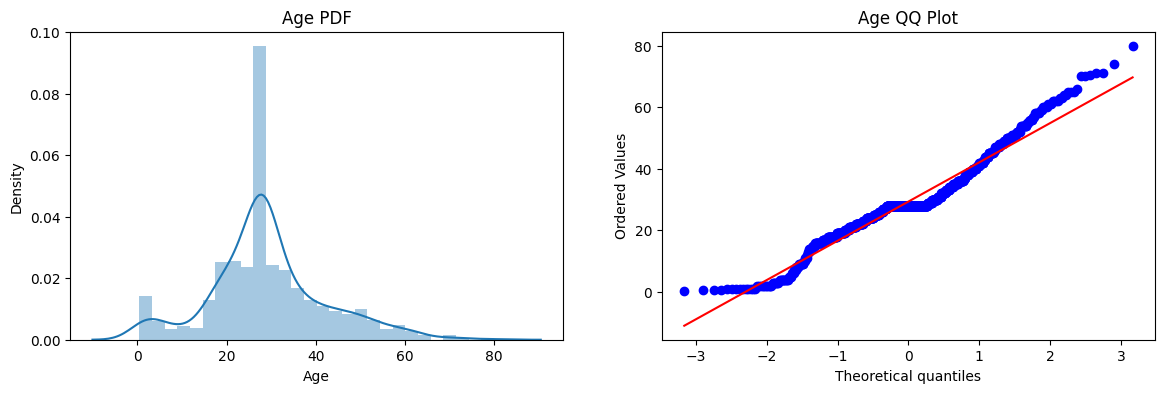

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12204\3241265555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


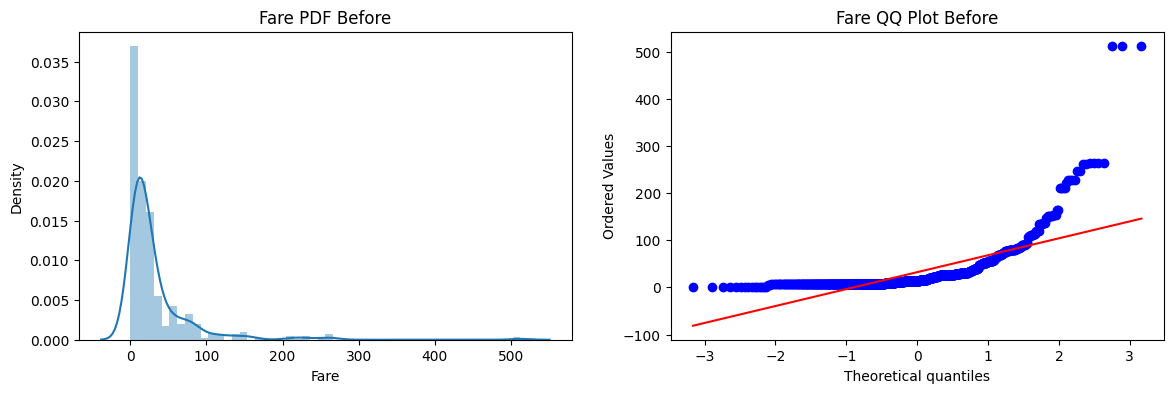

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF Before')

plt.subplot(122)
stats.probplot(df['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot Before')
plt.show()

In [15]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y1_pred=clf1.predict(X_test)

print("Accuracy Score LR:",accuracy_score(y_test,y_pred))
print("Accuracy Score DT:",accuracy_score(y_test,y1_pred))


Accuracy Score LR: 0.6480446927374302
Accuracy Score DT: 0.6703910614525139


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#df['Fare']=np.log1p(df['Fare'].clip(lower=-0.999999))
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
df['Fare']=np.log1p(df['Fare'])

In [19]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [21]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [22]:
X_train_tnf,X_test_tnf,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train_tnf

,Age,Fare
331,45.5,3.384390
733,23.0,2.639057
382,32.0,2.188856
704,26.0,2.180892
813,6.0,3.474293
...,...,...
106,21.0,2.157559
270,28.0,3.465736
860,41.0,2.715244
435,14.0,4.795791


In [24]:
clf.fit(X_train_tnf,y_train)
clf1.fit(X_train_tnf,y_train)

y_pred=clf.predict(X_test_tnf)
y1_pred=clf1.predict(X_test_tnf)

print("Accuracy Score LR:",accuracy_score(y_test,y_pred))
print("Accuracy Score DT:",accuracy_score(y_test,y1_pred))

Accuracy Score LR: 0.6759776536312849
Accuracy Score DT: 0.659217877094972


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12204\2301326898.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


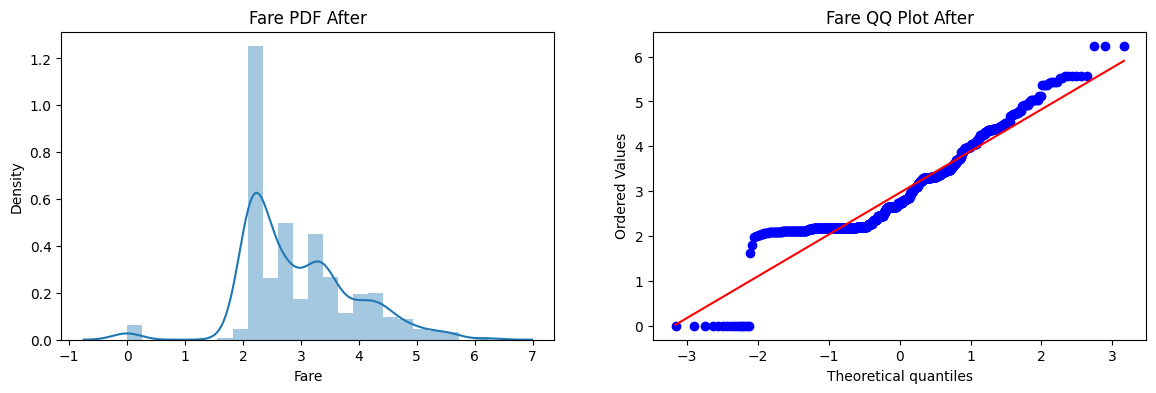

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF After')

plt.subplot(122)
stats.probplot(df['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot After')
plt.show()